In [1]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, ExtraTreesClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier

In [2]:
# 載入 MNIST 資料集
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(int)




Loading MNIST dataset...


In [3]:
preprocess_pipe = make_pipeline(
    StandardScaler(),
)
preprocess_pipe.fit(X)
X_scaled = preprocess_pipe.transform(X)


In [4]:
# 分割資料集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=20000, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=10000, random_state=42)

In [5]:
# 通用函數：繪製混淆矩陣
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# # 生成並繪製 Random Forest 的混淆矩陣
# print("Generating confusion matrix for Random Forest...")
# y_test_pred_rf = rf_clf.predict(X_test)  # rf_clf 是 Random Forest 模型
# plot_confusion_matrix(y_test, y_test_pred_rf, "Random Forest")

# # 生成並繪製 Extra-Trees 的混淆矩陣
# print("Generating confusion matrix for Extra-Trees...")
# y_test_pred_et = et_clf.predict(X_test)  # et_clf 是 Extra-Trees 模型
# plot_confusion_matrix(y_test, y_test_pred_et, "Extra-Trees")

# # 生成並繪製 SVM 的混淆矩陣
# print("Generating confusion matrix for SVM...")
# y_test_pred_svm = svm_clf.predict(X_test)  # svm_clf 是 SVM 模型
# plot_confusion_matrix(y_test, y_test_pred_svm, "SVM")


# 訓練 Random Forest 模型


Training Random Forest classifier...
Validation accuracy: 0.9675


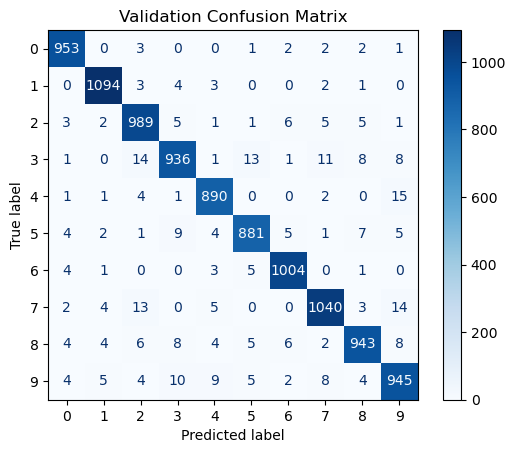

Test accuracy: 0.9673


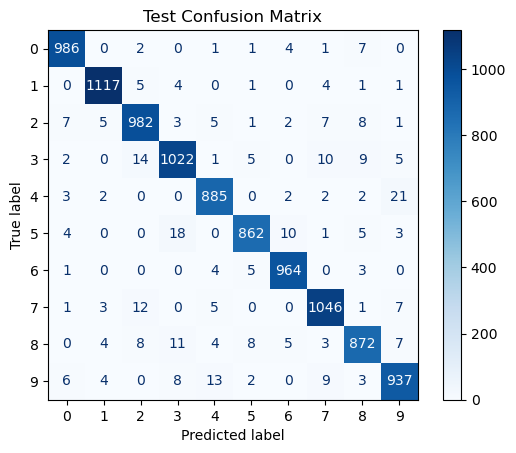

In [6]:

print("Training Random Forest classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 在驗證集上進行評估
y_valid_pred = rf_clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation accuracy: {accuracy:.4f}")

#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=rf_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

# 在測試集上進行最終評估
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=rf_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()


# 訓練 Extra-Trees 模型

In [ ]:

print("Training Extra-Trees classifier...")
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)

# 在驗證集上進行評估
y_valid_pred = et_clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation accuracy: {accuracy:.4f}")

#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=et_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

# 在測試集上進行最終評估
y_test_pred = et_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=et_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()


Training Extra-Trees classifier...


# 訓練 SVM Classifier

In [ ]:
svm_clf = SVC(kernel="rbf", C=10, gamma="scale", probability=True, random_state=42,max_iter=100000)  # RBF kernel with tuned parameters
svm_clf.fit(X_train, y_train)

Validation Accuracy: 0.9823


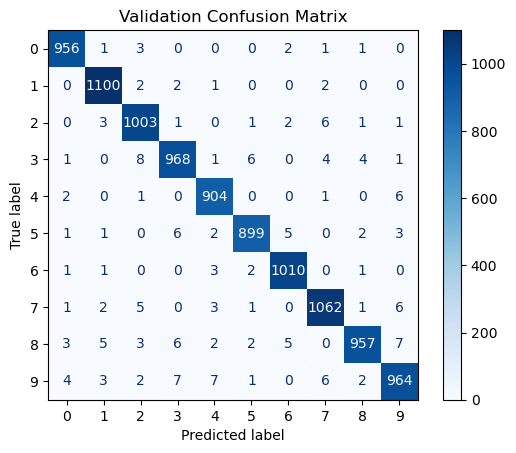

Test Accuracy: 0.9820


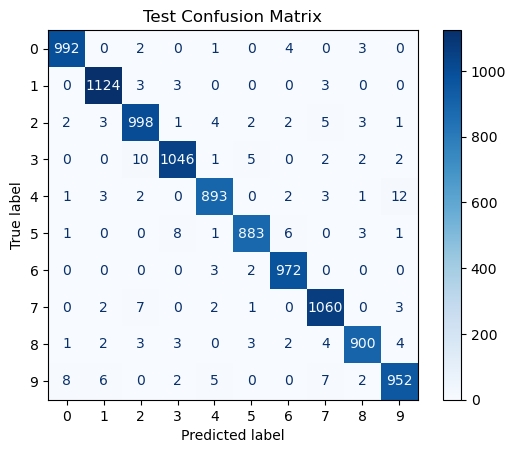

In [ ]:
# #載入 MNIST 資料集
# mnist = tf.keras.datasets.mnist
# (X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()



# #手動分割資料
# X_train, X_val = X_train_full[:50000], X_train_full[50000:]
# y_train, y_val = y_train_full[:50000], y_train_full[50000:]

#驗證模型
y_val_pred = svm_clf.predict(X_valid)
val_accuracy = accuracy_score(y_valid, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=svm_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

#測試模型
y_test_pred = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=svm_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()

In [ ]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_valid.shape}, y_val shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (50000, 784), y_train shape: (50000,)
X_val shape: (10000, 784), y_val shape: (10000,)
X_test shape: (10000, 784), y_test shape: (10000,)


# Soft Voting

Training Ensemble Model...
Ensemble Model - Validation Accuracy: 0.9825
Ensemble Model - Test Accuracy: 0.9818


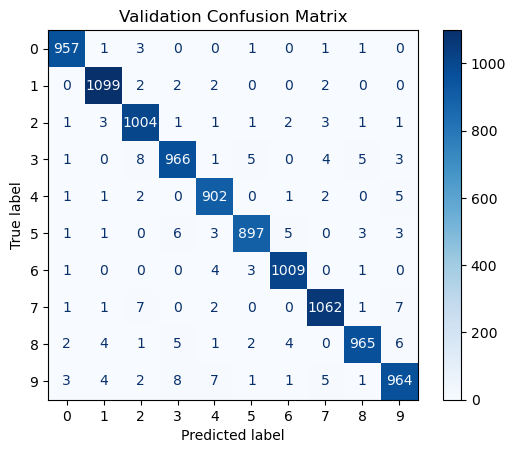

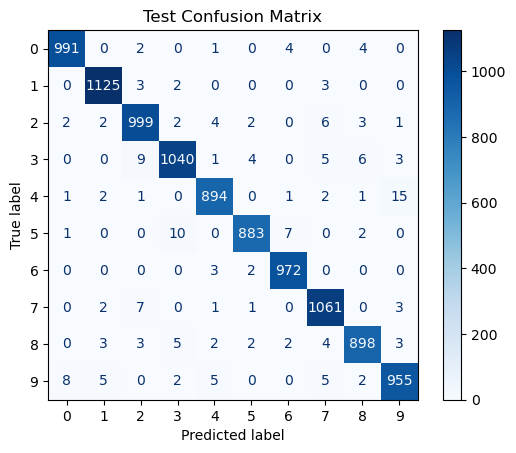

In [ ]:
# 集成模型 - VotingClassifier

# 定義集成模型，使用軟投票
ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),   # Random Forest
        ('et', et_clf),   # Extra-Trees
        ('svm', svm_clf)  # SVM
    ],
    voting='soft',       # 使用 Soft Voting
    weights=[1, 1, 1],   # 各模型權重（可以根據性能調整）
    n_jobs=-1            # 使用多核加速
)

# 訓練集成模型
print("Training Ensemble Model...")
ensemble_clf.fit(X_train, y_train)  # SVM 需要標準化後的資料

# 驗證集評估
y_val_pred_ensemble = ensemble_clf.predict(X_valid)
val_accuracy_ensemble = accuracy_score(y_valid, y_val_pred_ensemble)
print(f"Ensemble Model - Validation Accuracy: {val_accuracy_ensemble:.4f}")

# 測試集評估
y_test_pred_ensemble = ensemble_clf.predict(X_test)
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
print(f"Ensemble Model - Test Accuracy: {test_accuracy_ensemble:.4f}")

#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_val_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=ensemble_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=ensemble_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()


# bagging for Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# 使用 Random Forest 作為基分類器
base_clf_rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Bagging 集成模型
bagging_rf_clf = BaggingClassifier(
    estimator=base_clf_rf,
    n_estimators=50,              # Bagging 的分類器數量
    max_samples=0.8,              # 每次抽樣的樣本比例
    max_features=0.8,             # 每次抽樣的特徵比例
    bootstrap=True,               # 是否有放回抽樣
    bootstrap_features=False,     # 特徵是否有放回抽樣
    random_state=42,              # 隨機種子
    n_jobs=-1                     # 使用多核加速
)

# 訓練模型
print("Training Bagging Model with Random Forest...")
bagging_rf_clf.fit(X_train, y_train)

# 驗證集評估
y_val_pred_bagging_rf = bagging_rf_clf.predict(X_valid)
val_accuracy_bagging_rf = accuracy_score(y_valid, y_val_pred_bagging_rf)
print(f"Bagging (Random Forest) - Validation Accuracy: {val_accuracy_bagging_rf:.4f}")

# 測試集評估
y_test_pred_bagging_rf = bagging_rf_clf.predict(X_test)
test_accuracy_bagging_rf = accuracy_score(y_test, y_test_pred_bagging_rf)
print(f"Bagging (Random Forest) - Test Accuracy: {test_accuracy_bagging_rf:.4f}")


Training Bagging Model with Random Forest...
Bagging (Random Forest) - Validation Accuracy: 0.9623
Bagging (Random Forest) - Test Accuracy: 0.9629


# find best model

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 定義基分類器
base_clf_rf = RandomForestClassifier(random_state=42)

# 定義 Bagging 集成模型
bagging_rf_clf = BaggingClassifier(
    estimator=base_clf_rf,
    bootstrap=True,               # 是否有放回抽樣
    bootstrap_features=False,     # 特徵是否有放回抽樣
    random_state=42,
    n_jobs=-1                     # 使用多核加速
)

# 定義參數搜索範圍
param_grid = {
    # BaggingClassifier 的參數
    'n_estimators': [10, 100],          # Bagging 的分類器數量
    'max_samples': [0.8, 1.0],         # 每次抽樣的樣本比例
    'max_features': [0.8, 1.0],        # 每次抽樣的特徵比例

    # 基分類器 Random Forest 的參數
    'estimator__n_estimators': [10, 50],    # Random Forest 的樹數量
    'estimator__max_depth': [10, 20]  # Random Forest 的最大深度
}

# 使用 GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_rf_clf,
    param_grid=param_grid,
    cv=3,                     # 三折交叉驗證
    scoring='accuracy',       # 使用準確率作為評估指標
    n_jobs=-1,                # 使用多核加速
    verbose=1                 # 顯示詳細訓練過程
)

# 執行 GridSearchCV
print("Performing GridSearchCV...")
grid_search.fit(X_train, y_train)

# 獲取最佳參數與模型
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {grid_search.best_score_:.4f}")

# 驗證集評估
y_val_pred_bagging_rf = best_model.predict(X_valid)
val_accuracy_bagging_rf = accuracy_score(y_valid, y_val_pred_bagging_rf)
print(f"Optimized Bagging (Random Forest) - Validation Accuracy: {val_accuracy_bagging_rf:.4f}")

# 測試集評估
y_test_pred_bagging_rf = best_model.predict(X_test)
test_accuracy_bagging_rf = accuracy_score(y_test, y_test_pred_bagging_rf)
print(f"Optimized Bagging (Random Forest) - Test Accuracy: {test_accuracy_bagging_rf:.4f}")


Performing GridSearchCV...
Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


MemoryError: Unable to allocate 99.7 MiB for an array with shape (16667, 784) and data type int64

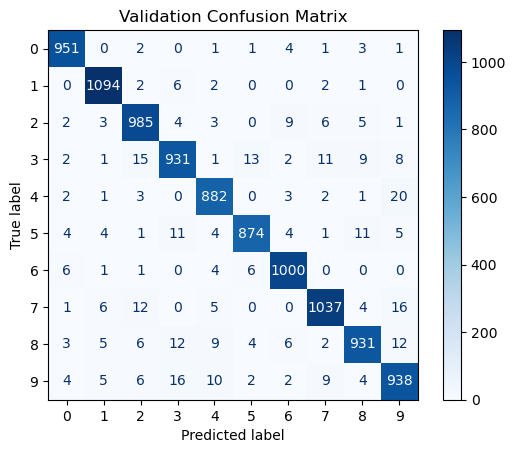

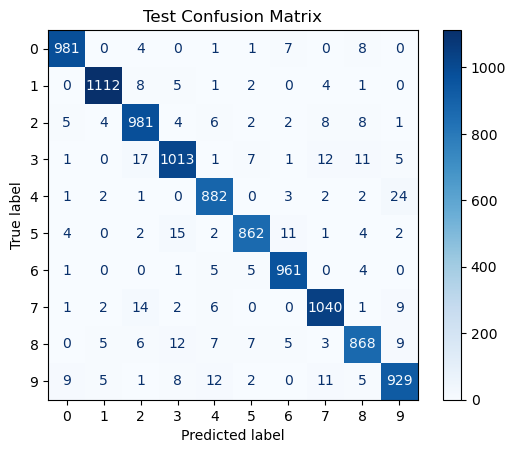

In [ ]:
#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_val_pred_bagging_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=bagging_rf_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred_bagging_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=bagging_rf_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()


# bagging for SVC

In [ ]:
from sklearn.svm import SVC

# 使用 SVM 作為基分類器
base_clf_svm = SVC(kernel="rbf", C=10, gamma="scale", probability=True, random_state=42)

# Bagging 集成模型
bagging_svm_clf = BaggingClassifier(
    estimator=base_clf_svm,
    n_estimators=10,              # SVM 是計算密集型，使用較少的分類器數量
    max_samples=0.8,              # 每次抽樣的樣本比例
    bootstrap=True,               # 是否有放回抽樣
    random_state=42,              # 隨機種子
    n_jobs=-1                     # 使用多核加速
)

# 訓練模型
print("Training Bagging Model with SVM...")
bagging_svm_clf.fit(X_train, y_train)

# 驗證集評估
y_val_pred_bagging_svm = bagging_svm_clf.predict(X_valid)
val_accuracy_bagging_svm = accuracy_score(y_valid, y_val_pred_bagging_svm)
print(f"Bagging (SVM) - Validation Accuracy: {val_accuracy_bagging_svm:.4f}")

# 測試集評估
y_test_pred_bagging_svm = bagging_svm_clf.predict(X_test)
test_accuracy_bagging_svm = accuracy_score(y_test, y_test_pred_bagging_svm)
print(f"Bagging (SVM) - Test Accuracy: {test_accuracy_bagging_svm:.4f}")


Training Bagging Model with SVM...
Bagging (SVM) - Validation Accuracy: 0.9802
Bagging (SVM) - Test Accuracy: 0.9801


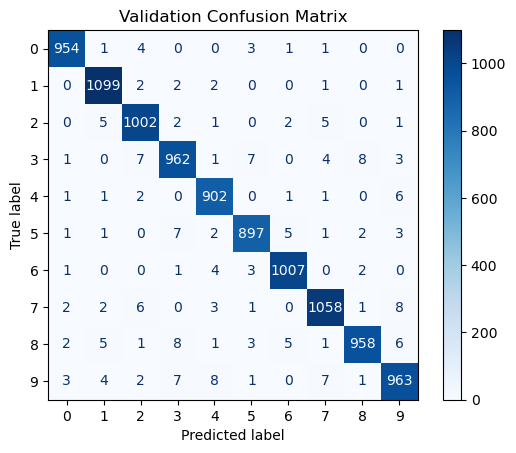

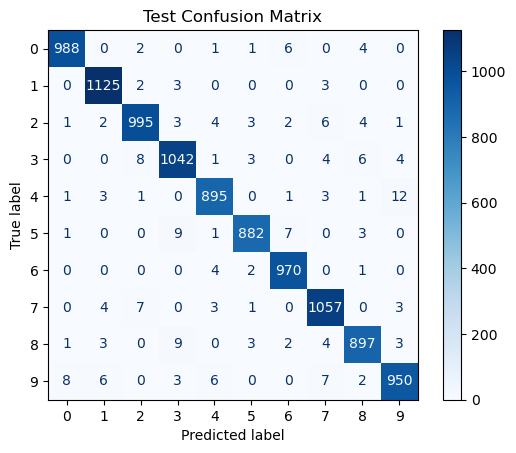

In [ ]:
#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_val_pred_bagging_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=bagging_svm_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred_bagging_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=bagging_svm_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()


# bagging for Extra-Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

# 使用 Extra-Trees 作為基分類器
base_clf_et = ExtraTreesClassifier(n_estimators=10, random_state=42)

# Bagging 集成模型
bagging_et_clf = BaggingClassifier(
    estimator=base_clf_et,        # Extra-Trees 作為基分類器
    n_estimators=50,              # Bagging 的分類器數量
    max_samples=0.8,              # 每次抽樣的樣本比例
    max_features=0.8,             # 每次抽樣的特徵比例
    bootstrap=True,               # 是否有放回抽樣
    bootstrap_features=False,     # 特徵是否有放回抽樣
    random_state=42,              # 隨機種子
    n_jobs=-1                     # 使用多核加速
)

# 訓練模型
print("Training Bagging Model with Extra-Trees...")
bagging_et_clf.fit(X_train, y_train)

# 驗證集評估
y_val_pred_bagging_et = bagging_et_clf.predict(X_valid)
val_accuracy_bagging_et = accuracy_score(y_valid, y_val_pred_bagging_et)
print(f"Bagging (Extra-Trees) - Validation Accuracy: {val_accuracy_bagging_et:.4f}")

# 測試集評估
y_test_pred_bagging_et = bagging_et_clf.predict(X_test)
test_accuracy_bagging_et = accuracy_score(y_test, y_test_pred_bagging_et)
print(f"Bagging (Extra-Trees) - Test Accuracy: {test_accuracy_bagging_et:.4f}")


Training Bagging Model with Extra-Trees...
Bagging (Extra-Trees) - Validation Accuracy: 0.9664
Bagging (Extra-Trees) - Test Accuracy: 0.9676


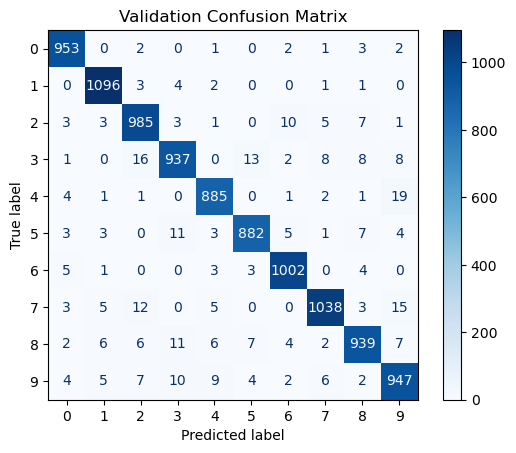

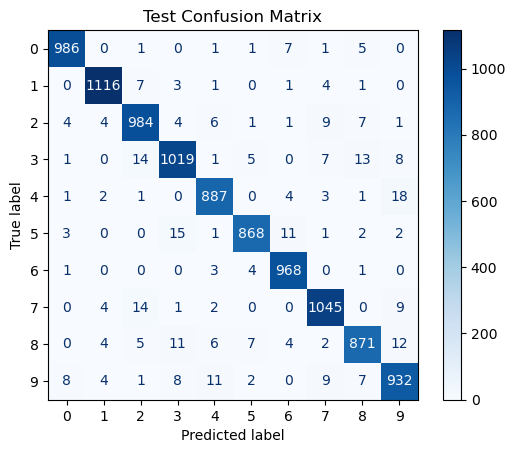

In [ ]:
#繪製驗證資料的混淆矩陣
val_cm = confusion_matrix(y_valid, y_val_pred_bagging_et)
disp = ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=bagging_et_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Validation Confusion Matrix")
plt.show()

#繪製測試資料的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred_bagging_et)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=bagging_et_clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Test Confusion Matrix")
plt.show()
